In [1]:
%matplotlib inline

In [2]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# load csv file
citypath = "City_Data.csv"
ridepath = "Ride_Data.csv"
city_data = pd.read_csv(citypath)
ride_data = pd.read_csv(ridepath)

In [4]:
#visualize
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Combine the data into a single dataset using outer method so as not to lose/
# data that does not appear in both during the merge

combined = pd.merge(city_data, ride_data, how="outer", on="city")

In [6]:
# display the data table for preview
combined.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.630000e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100000e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.210000e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.550000e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200000e+11


In [7]:
# Create Bubble Plot of Ride Sharing Data===

In [8]:
# start by creating city groups
city_group = combined.groupby('city')

#if just did city_group.mean(), we would get avg of every column for each city/
#by specifying "fare" column in brackets after .mean() we just get avg fare/
#for each city
avg_fare = city_group.mean()['fare']

ride_count = city_group['ride_id'].count()

In [9]:
# make new data frame by adding columns to city_data dataframe
# set index to city so that the calculated values for each city can sync up with/
# the city name (index acts as a key)

city_data = city_data.set_index("city")
city_data["average_fare"] = avg_fare
city_data["number_of_rides"] = ride_count

city_data.head()

,driver_count,type,average_fare,number_of_rides
city,,,,
Richardfort,38,Urban,22.373214,28
Williamsstad,59,Urban,24.362174,23
Port Angela,67,Urban,23.836842,19
Rodneyfort,34,Urban,28.616957,23
West Robert,39,Urban,25.123871,31


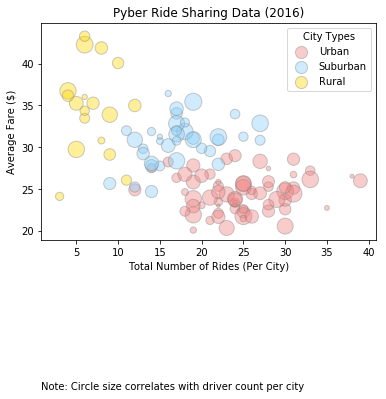

In [10]:
# need to create three diff sets of data and plot on the same graph so that we can have 
# different colors for urban, suburban, rural

urban_group = city_data.loc[city_data["type"] == "Urban"]
suburban_group = city_data.loc[city_data["type"] == "Suburban"]
rural_group = city_data.loc[city_data["type"] == "Rural"]

#create bubble plot
# the ax parameter is important bc without it you get three different plots; doing ax=urban_bubbles when plotting suburban and rural puts everything on one
# s=city_data[driver count] left bubbles too small and it was hard to see bubble size variation so i multiplied by numbers and found best looking value thru trial and error

urban_bubbles = urban_group.plot(kind="scatter", x="number_of_rides", y="average_fare", color="lightcoral", s=city_data["driver_count"]*4, label = "Urban", alpha = 0.4, edgecolor = "grey", linewidths = 1)
suburban_bubbles = suburban_group.plot(kind='scatter', x='number_of_rides', y='average_fare', color='lightskyblue',s=city_data['driver_count']*4, label = 'Suburban', alpha = 0.4, edgecolor = "grey", linewidths = 1, ax=urban_bubbles)
rural_bubbles = rural_group.plot(kind='scatter', x='number_of_rides', y='average_fare', color='gold',s=city_data['driver_count']*4, label = 'Rural', alpha = 0.4, edgecolor = "grey", linewidths = 1, ax=urban_bubbles)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')
plt.text(0.75, 1, "Note: Circle size correlates with driver count per city")
plt.savefig("PyberBubblePlot.png")

In [11]:
# ===== Pie Chart % of Total Fares by City Type ======

In [12]:
# disregard - dont need to calculate total fares bc autopct calculates this automatically in pie chart
    #total_fares = combined["fare"].sum()
#================================================================================

#create citytype data subsets using merged/combined dataset

urban_combined = combined.loc[combined["type"] == "Urban"]
suburban_combined = combined.loc[combined["type"] == "Suburban"]
rural_combined = combined.loc[combined["type"] == "Rural"]

urban_fares = urban_combined["fare"].sum()
suburban_fares = suburban_combined["fare"].sum()
rural_fares = rural_combined["fare"].sum()

#city type and city type colors will remain consistent throughout all three pie charts

city_type = ["Urban", "Suburban", "Rural"]
city_type_colors = ["lightcoral", "lightskyblue", "gold"]

city_type_fares = [urban_fares, suburban_fares, rural_fares]
city_fares_explode = [0.1, 0, 0]

#disregard - don't need this but want to keep for my own learning============================

    #fares_df = pd.DataFrame(list(zip(city_type, city_type_fares)), columns=["city_type", "city_fares"])
    #fares_df = fares_df.set_index("city_type")

    #fares_df

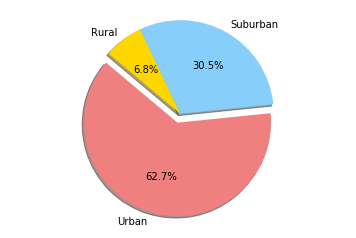

In [13]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(city_type_fares, explode=city_fares_explode, labels=city_type, colors=city_type_colors, autopct="%1.1f%%",
 shadow=True, startangle=140)
# Create equal axes for nice circle
plt.axis("equal")

plt.savefig("PyberFaresPie.png")

In [14]:
# ======= % of Total Rides by City Type =======

In [15]:
urban_rides = urban_combined["ride_id"].count()
suburban_rides = suburban_combined["ride_id"].count()
rural_rides = rural_combined["ride_id"].count()

city_type_rides = [urban_rides, suburban_rides, rural_rides]
city_rides_explode = [0.1, 0, 0]

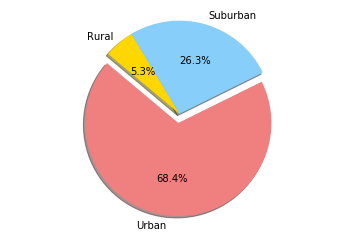

In [16]:
# create pie chart for ride numbers
plt.pie(city_type_rides, explode=city_rides_explode, labels=city_type, colors=city_type_colors, autopct="%1.1f%%",
 shadow=True, startangle=140)
# Create equal axes for nice circle
plt.axis("equal")

plt.savefig("PyberRidesPie.png")

In [17]:
# ====== % of Total Drivers by City Type ======

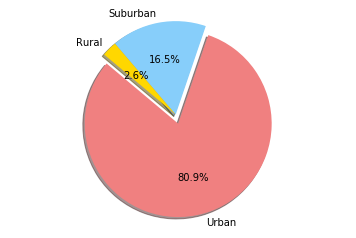

In [18]:
#need to drop duplicates from combined data frame bc otherwise it repeats the number of drivers /
#each time the city appears in the list

no_duplicates = combined.drop_duplicates('city', keep = 'first')

urban_combined_driver = no_duplicates.loc[combined["type"] == "Urban"]
suburban_combined_driver = no_duplicates.loc[combined["type"] == "Suburban"]
rural_combined_driver = no_duplicates.loc[combined["type"] == "Rural"]

urban_drivers = urban_combined_driver["driver_count"].sum()
suburban_drivers = suburban_combined_driver["driver_count"].sum()
rural_drivers = rural_combined_driver["driver_count"].sum()

city_type_drivers = [urban_drivers, suburban_drivers, rural_drivers]
city_drivers_explode = [0.1, 0, 0]

# create pie chart for drive numbers
plt.pie(city_type_drivers, explode=city_drivers_explode, labels=city_type, colors=city_type_colors, autopct="%1.1f%%",
 shadow=True, startangle=140)
# Create equal axes for nice circle
plt.axis("equal")

plt.savefig("PyberDriversPie.png")